In [49]:
import numpy as np

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

import matplotlib.pyplot as plt

import plotly.plotly as py
py.sign_in('carlos-castaneda', 'xno9347pjk')

%matplotlib inline

In [77]:
#hits = np.genfromtxt("/home/mborisyak/Downloads/hits.csv", delimiter=',', skip_header=1)
#tracks = np.genfromtxt("/home/mborisyak/Downloads/track_ns_0.csv")

def get_hits(data, event_n):
    return data[data[:, 0] == event_n][:,-3:]

def plot_event(event, track_ns=None):
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(num=None, figsize=(16, 8), dpi=400)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(event[:, 2], event[:, 0], event[:, 1], color="b", alpha=0.25, s = 1.0)
    
    if track_ns is not None:
        for i in range(track_ns.shape[0]):
            (nx, ny, nz) = track_ns[i, :]
            ax.plot([0, nz], [0, nx], [0, ny], c = "r", linewidth=1.0, alpha=0.5)

    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")

    deltas = [ event[:, i].max() - event[:, i].min() for i in range(3) ]
    
    d = [ max(deltas) - delta for delta in deltas ]
    lims = [ [event[:, i].min() - d[i] / 2, event[:, i].max() + d[i] / 2] for i in range(3) ]
    
    ax.set_xlim(lims[2])
    ax.set_ylim(lims[0])
    ax.set_zlim(lims[1])

def plot_event_plotly(event, tracks=[]):
    def with_return_to_origin(t):
        t1 = np.zeros(t.shape[0] * 2)
        t1[1::2] = t
        return t1

    hits_3d = Scatter3d(
        x=event[:, 2],
        y= event[:, 0],
        z=event[:, 1],
        mode="markers",
        marker= {"size" : 2.5}
    )
    
    tracks_3d = [Scatter3d (
        x=with_return_to_origin(ts[:, 2]),  # x coords
        y=with_return_to_origin(ts[:, 0]),  # y coords
        z=with_return_to_origin(ts[:, 1]),  # z coords
        mode='lines',      # (!) draw lines between coords (as in Scatter)
        line=Line(
            color=color, # black line segments
            width=1
          )
    ) for ts, color in tracks]

    data = Data([hits_3d] + tracks_3d)
    
    # Make a figure object
    fig = Figure(data=data)
    
    return py.iplot(fig, filename="retina_sim")

In [72]:
from pyretina import simulation

event, true_params, true_ns = simulation.particles(
    n_particles = 30, detector_layers = np.arange(20) + 1,
    theta_limits = [-0.25, 0.25], phi_limits = [-np.pi, np.pi],
    trace_probability = 1.0,
    noise_eps = 0.0
)

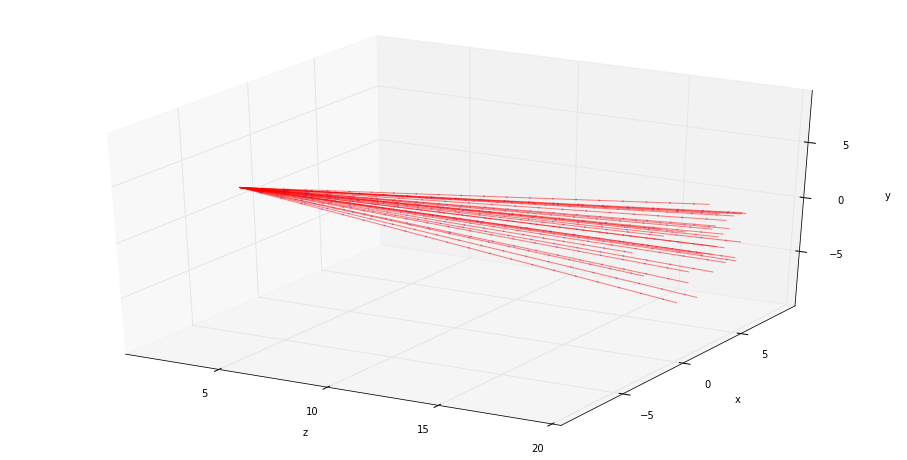

In [69]:
plot_event(event, true_ns * 21)

In [78]:
plot_event_plotly(event, [(true_ns * 21, "green")])

In [82]:
from pyretina.optimize import grid_search

In [83]:
theta_limits = [-0.1, 0.1]
phi_limits = [-np.pi, np.pi]

grid_search.grid_search(event, theta_limits, 100, phi_limits, 100, 0.01)

AttributeError: 'tuple' object has no attribute 'shape'